## Read Data Demo

This is just a quick demo to show how to read data. Prepared by [Qingkai Kong](http://seismo.berkeley.edu/qingkaikong/).  

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
def get_data(data):
    '''
    helper function to get the timestamp and 3-component acceleration data. 
    '''
    # read in x, y, z data
    x = data['data']['x']
    y = data['data']['y']
    z = data['data']['z']

    # calculate the timestamp
    # get the start time
    t0 = data['header']['starttime']
    npoints = len(x)
    sampling_rate = data['header']['sampling_rate']
    
    # get the end time 
    t1 = t0 + npoints / sampling_rate
    
    # form the timestamp
    t = [t0 + tmp/sampling_rate for tmp in range(0, npoints)]
    
    # station latitude and long
    return t, x, y, z

def plot_data(t, x, y, z):
    '''
    helper function to plot the 3-component acceleration data
    '''
    plt.subplot(311)
    plt.plot(t, x)
    plt.subplot(312)
    plt.plot(t, y)
    plt.ylabel('Acceleration (g)')
    plt.subplot(313)
    plt.plot(t, z)
    plt.xlabel('Time (sec)')
    plt.show()

## Read simulated data

In [73]:
import os
cwd = os.getcwd()
print cwd
data = json.load(open('../../data/EQ/simulated/12951_M5.1_1396066202.json', 'rb'))

/home/wangyu/github/MyShakeAnalysis/code/Hue


1625 1625 25.0


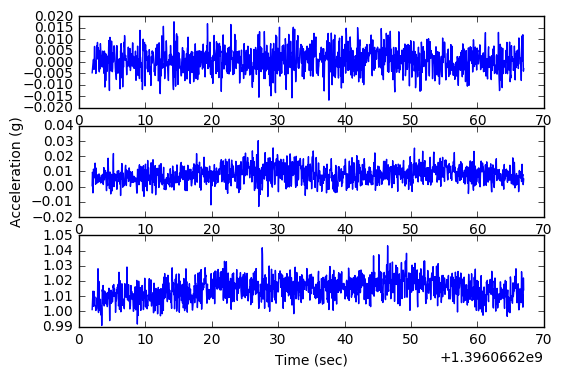

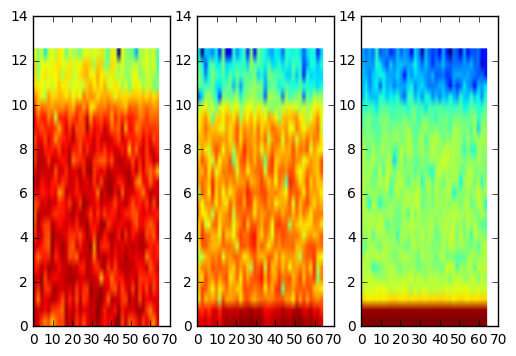

In [74]:
t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
print len(x), len(t), rate
plot_data(t, x, y, z)
from matplotlib.pyplot import specgram
plt.subplot(131)
timeWindow = 2
specgram(x, NFFT=int(rate) * timeWindow, Fs=rate, noverlap = 5);
plt.subplot(132)
specgram(y, NFFT=int(rate) * timeWindow, Fs=rate, noverlap = 5);
plt.subplot(133)
specgram(z, NFFT=int(rate) * timeWindow, Fs=rate, noverlap = 5);

## Read shake table data

In [48]:
data = json.load(open('./EQ/shake_table/trial142_phone3.json', 'rb'))

988 989 25.0


ValueError: x and y must have same first dimension

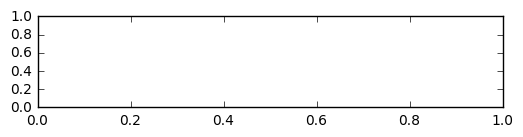

In [54]:
t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
print len(x), len(t), rate
plot_data(t, x, y, z)
from matplotlib.pyplot import specgram
specgram(z, NFFT=100, Fs=rate, noverlap = 50);

## Read human data

In [7]:
data = json.load(open('./Human/013306004148017_1415046600.json', 'rb'))

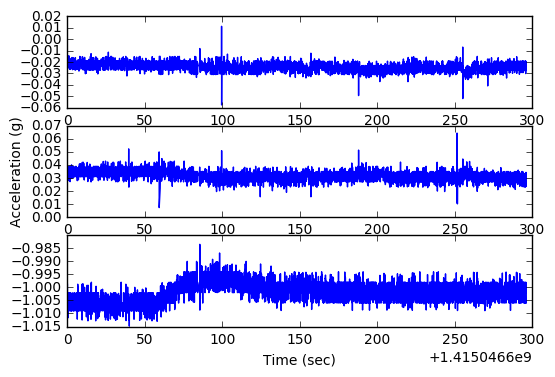

In [8]:
t, x, y, z = get_data(data)
plot_data(t, x, y, z)